In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing , svm
import math

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r'C:\Users\honey\OneDrive\Masaüstü\WTECH\project-2\used_cars_data.csv')

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
# we can drop the first column because it represent the number of rows
df = df.drop(['S.No.'], axis=1)

In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df= df.drop_duplicates()

In [10]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [11]:
df.columns.str.strip()

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [12]:
df.shape

(7252, 13)

In [13]:
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2279,Mahindra Ssangyong Rexton RX7,Kochi,2015,67415,Diesel,Automatic,First,11.18 kmpl,2696 CC,184 bhp,7.0,NaN,11.03
3065,Mercedes-Benz E-Class 2009-2013 E350 Petrol,Mumbai,2010,73000,Petrol,Automatic,First,10.93 kmpl,3498 CC,272 bhp,5.0,NaN,10.40
1703,Toyota Fortuner 4x2 AT,Delhi,2013,65000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,NaN,16.50
4571,Maruti Alto K10 LXI,Delhi,2016,35027,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,3.91 Lakh,3.00
7143,Mahindra XUV500 W8 4WD,Coimbatore,2015,63008,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN,NaN


In [14]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [15]:
df['Name'].value_counts().head(10)

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: Name, dtype: int64

In [16]:
# seperating both brand and model is necessary in this case
df['Name'] = df['Name'].str.split(' ', 1)

df['Brand'] = df['Name'].apply(lambda x: x[0])
df['Model'] = df['Name'].apply(lambda x: x[1])

df.drop('Name', axis=1, inplace=True)

In [17]:
df['Brand'].isnull().sum()

0

In [18]:
df['Model'].isnull().sum()

0

In [19]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [20]:
df['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             742
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

In [21]:
# There are some brand names that need to be renamed to make data clarifier
df['Brand']=df['Brand'].replace('ISUZU','Isuzu')
df['Brand']=df['Brand'].replace('OpelCorsa','Opel')
df['Brand']=df['Brand'].replace('Mini','Mini Cooper')
df['Brand']=df['Brand'].replace('Land','Land Rover')

In [22]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'Opel'], dtype=object)

In [23]:
df['Brand'].nunique()

32

In [24]:
df['Brand'].isnull().sum()

0

In [25]:
df['Model'].isnull().sum()

0

In [26]:
df['Model'].nunique()

2041

In [27]:
sorted_models= df['Model'].value_counts().sort_values(ascending=False)
sorted_models.head(10)

XUV500 W8 2WD          55
Swift VDI              49
Swift Dzire VDI        42
City 1.5 S MT          39
Swift VDI BSIV         37
Ritz VDi               35
Fortuner 3.0 Diesel    35
Amaze S i-Dtech        32
City 1.5 V MT          32
Brio S MT              32
Name: Model, dtype: int64

In [28]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [29]:
df['Location'].value_counts()

Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [30]:
from datetime import datetime

df['current_year'] = datetime.now().year
df['car_age']=df['current_year']-df['Year']

df.drop(['Year','current_year'], axis=1, inplace=True)

In [31]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,14
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,9
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz V,13
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga VDI,12
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,11


In [32]:
df.dtypes

Location              object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
Brand                 object
Model                 object
car_age                int64
dtype: object

In [33]:
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [34]:
df['Transmission'].value_counts()

Manual       5203
Automatic    2049
Name: Transmission, dtype: int64

In [35]:
df['Owner_Type'].value_counts()

First             5951
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [36]:
# transforming these three features to categorical type of data can help us to get better results for our model

In [37]:
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']
df[categorical_cols] = df[categorical_cols].astype('category')

In [38]:
df.dtypes

Location               object
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                object
Engine                 object
Power                  object
Seats                 float64
New_Price              object
Price                 float64
Brand                  object
Model                  object
car_age                 int64
dtype: object

In [39]:
df['Mileage'].value_counts()

17.0 kmpl     206
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
             ... 
22.8 km/kg      1
8.0 kmpl        1
7.81 kmpl       1
14.47 kmpl      1
17.15 kmpl      1
Name: Mileage, Length: 450, dtype: int64

In [40]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [41]:
mileage_counts = df.groupby('Fuel_Type')['Mileage'].value_counts()
print(mileage_counts)

Fuel_Type  Mileage    
CNG        26.6 km/kg     13
           15.1 km/kg      6
           26.2 km/kg      5
           32.26 km/kg     5
           33.54 km/kg     5
                          ..
Petrol     8.3 kmpl        1
           8.5 kmpl        1
           8.77 kmpl       1
           9.5 kmpl        1
           9.7 kmpl        1
Name: Mileage, Length: 549, dtype: int64


In [42]:
df['Mileage'].isnull().sum()

2

In [43]:
nan_values_mileage= df[df['Mileage'].isna()]
nan_values_mileage.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
4446,Chennai,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,Mahindra,E Verito D4,8
4904,Mumbai,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75,Toyota,Prius 2009-2016 Z4,13


In [44]:
df['Mileage'] = df['Mileage'].str.rstrip(" kmpl")
df['Mileage'] = df['Mileage'].str.rstrip(" km/g")

df['Mileage'] = df['Mileage'].astype(float)

In [45]:
df[df['Mileage'].isin([0])]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
14,Pune,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,NaN,17.50,Land Rover,Rover Freelander 2 TD4 SE,12
67,Coimbatore,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,49.14 Lakh,35.67,Mercedes-Benz,C-Class Progressive C 220d,5
79,Hyderabad,87591,Petrol,Manual,First,0.0,1086 CC,null bhp,5.0,NaN,1.30,Hyundai,Santro Xing XL,19
194,Ahmedabad,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95,Honda,City 1.5 GXI,17
229,Bangalore,70436,Diesel,Manual,First,0.0,1498 CC,99 bhp,NaN,NaN,3.60,Ford,Figo Diesel,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Kolkata,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,NaN,Mahindra,TUV 300 P4,8
6697,Jaipur,85000,Petrol,Manual,Second,0.0,1086 CC,null bhp,5.0,NaN,NaN,Hyundai,Santro Xing XL,17
6857,Mumbai,87000,Diesel,Automatic,First,0.0,2179 CC,115 bhp,5.0,NaN,NaN,Land Rover,Rover Freelander 2 TD4 SE,13
6957,Kochi,11574,Petrol,Manual,First,0.0,1199 CC,88.7 bhp,NaN,NaN,NaN,Honda,Jazz 2020 Petrol,5


In [46]:
df['Mileage'].replace(0, np.nan, inplace=True)

In [47]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
0,Mumbai,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,14
1,Pune,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,9
2,Chennai,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz V,13
3,Chennai,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga VDI,12
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,11


In [48]:
df['Engine'].value_counts()

1197 CC    732
1248 CC    610
1498 CC    370
998 CC     309
1198 CC    281
          ... 
1489 CC      1
1422 CC      1
2706 CC      1
1978 CC      1
1389 CC      1
Name: Engine, Length: 150, dtype: int64

In [49]:
df['Engine'].isnull().sum()

46

In [50]:
nan_values_engine= df[df['Engine'].isna()]
nan_values_engine.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
194,Ahmedabad,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,2.95,Honda,City 1.5 GXI,17
208,Kolkata,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,Maruti,Swift 1.3 VXi,14
733,Chennai,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,Maruti,Swift 1.3 VXi,18
749,Mumbai,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,NaN,26.50,Land Rover,Rover Range Rover 3.0 D,16
1294,Delhi,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,3.20,Honda,City 1.3 DX,15


In [51]:
df['Power'].value_counts()

74 bhp       280
98.6 bhp     166
73.9 bhp     152
140 bhp      142
null bhp     129
            ... 
421 bhp        1
89.75 bhp      1
387.3 bhp      1
226.6 bhp      1
241.6 bhp      1
Name: Power, Length: 386, dtype: int64

In [52]:
df['Power'].isnull().sum()

46

In [53]:
nan_values_power= df[df['Power'].isna()]
nan_values_power.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
194,Ahmedabad,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,2.95,Honda,City 1.5 GXI,17
208,Kolkata,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,Maruti,Swift 1.3 VXi,14
733,Chennai,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,Maruti,Swift 1.3 VXi,18
749,Mumbai,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,NaN,26.50,Land Rover,Rover Range Rover 3.0 D,16
1294,Delhi,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,3.20,Honda,City 1.3 DX,15


In [54]:
df[['Engine','Power']].head()

,Engine,Power
0,998 CC,58.16 bhp
1,1582 CC,126.2 bhp
2,1199 CC,88.7 bhp
3,1248 CC,88.76 bhp
4,1968 CC,140.8 bhp


In [55]:
df[['Engine','Power']].dtypes

Engine    object
Power     object
dtype: object

In [56]:
df['Engine'] = df['Engine'].astype(str).str.rstrip(" CC")
df['Power'] = df['Power'].astype(str).str.rstrip(" bhp")

df.replace('', np.nan, inplace=True)

df['Power'].replace('null', np.nan, inplace=True)
df['Power'] = df['Power'].astype(float)
df['Engine']=df['Engine'].astype(float)

In [57]:
df[['Engine','Power']].dtypes

Engine    float64
Power     float64
dtype: object

In [58]:
df[df['Engine'].isin([0])].value_counts()

Series([], dtype: int64)

In [59]:
df[df['Power'].isin([0])].value_counts()

Series([], dtype: int64)

In [60]:
df['Engine'].replace(0, np.nan, inplace=True)

In [61]:
df['Power'].replace(0, np.nan, inplace=True)

In [62]:
# also we need to check that if there any 0 values for seats column

In [63]:
df[df['Seats'].isin([0])]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
3999,Hyderabad,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,NaN,18.0,Audi,A4 3.2 FSI Tiptronic Quattro,12


In [64]:
# seat number can not be equal to 0, so we need to filter this
df['Seats']=df['Seats'].replace('0.0', np.nan)

In [65]:
df[df['Seats'].isin([0])].value_counts()

Series([], dtype: int64)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7169 non-null   float64 
 6   Engine             7206 non-null   float64 
 7   Power              7077 non-null   float64 
 8   Seats              7199 non-null   float64 
 9   New_Price          1006 non-null   object  
 10  Price              6019 non-null   float64 
 11  Brand              7252 non-null   object  
 12  Model              7252 non-null   object  
 13  car_age            7252 non-null   int64   
dtypes: category(3), float64(5), int64(2), object(4)
memory usage: 701.6+ KB


In [67]:
df.dtypes

Location               object
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price              object
Price                 float64
Brand                  object
Model                  object
car_age                 int64
dtype: object

In [68]:
df['New_Price'].value_counts()

63.71 Lakh    6
95.13 Lakh    6
4.78 Lakh     6
33.36 Lakh    6
44.28 Lakh    5
             ..
6.83 Lakh     1
9.09 Lakh     1
7.17 Lakh     1
11.77 Lakh    1
18.16 Lakh    1
Name: New_Price, Length: 625, dtype: int64

In [69]:
df['New_Price'].isnull().sum()

6246

In [70]:
df[df['New_Price'].isna()].head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,14
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,9
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI,12
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,11
5,Hyderabad,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,Hyundai,EON LPG Era Plus Option,12


In [71]:
df[df['New_Price'].notna()].head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V,13
7,Mumbai,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21 Lakh,17.50,Toyota,Innova Crysta 2.8 GX AT 8S,8
10,Kochi,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65 Lakh,9.95,Maruti,Ciaz Zeta,6
15,Delhi,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,32.01 Lakh,15.00,Mitsubishi,Pajero Sport 4X4,10
20,Kochi,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,47.87 Lakh,18.55,BMW,3 Series 320d,10


In [72]:
df['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [73]:
new_price_filled = df['New_Price'].fillna('')
cr_prices = df[new_price_filled.str.endswith('Cr')]
cr_prices.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age
148,Mumbai,23000,Petrol,Automatic,First,11.05,2894.0,444.0,4.0,1.28 Cr,37.00,Audi,RS5 Coupe,11
327,Coimbatore,97430,Diesel,Automatic,First,14.75,2967.0,245.0,7.0,1.04 Cr,62.67,Audi,Q7 45 TDI Quattro Technology,7
489,Pune,129000,Diesel,Automatic,First,11.00,2987.0,258.0,7.0,1 Cr,56.00,Mercedes-Benz,GLS 350d 4MATIC,7
1336,Mumbai,20002,Diesel,Automatic,First,14.75,2967.0,245.0,7.0,1.04 Cr,67.00,Audi,Q7 45 TDI Quattro Technology,8
1505,Kochi,26013,Diesel,Automatic,First,12.65,2993.0,255.0,5.0,1.39 Cr,97.07,Land Rover,Rover Range Rover Sport SE,5


In [74]:
import pandas as pd


def transform_price(price):
    if 'Lakh' in str(price):
        return float(str(price).replace(' Lakh', '')) * 100000  # 1 Lakh=100000 units
    elif 'Cr' in str(price):
        return float(str(price).replace(' Cr', '')) * 10000000  # 1 Cr= 10000000 units
    else:
        return float(price)

df['Transformed_Price'] = df['New_Price'].apply(transform_price)

In [75]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age,Transformed_Price
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,14,NaN
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,9,NaN
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V,13,861000.0
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI,12,NaN
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,11,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7169 non-null   float64 
 6   Engine             7206 non-null   float64 
 7   Power              7077 non-null   float64 
 8   Seats              7199 non-null   float64 
 9   New_Price          1006 non-null   object  
 10  Price              6019 non-null   float64 
 11  Brand              7252 non-null   object  
 12  Model              7252 non-null   object  
 13  car_age            7252 non-null   int64   
 14  Transformed_Price  1006 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(4)
memory 

In [77]:
# now it's time to delve into details to understand better distribution of features

In [78]:
numeric_columns =['Kilometers_Driven','Mileage','Engine','Power','Seats','Price','car_age','Transformed_Price']
categorical_columns =['Location','Fuel_Type','Transmission','Owner_Type','Brand']

In [79]:
numeric_columns

['Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'car_age',
 'Transformed_Price']

In [80]:
categorical_columns

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

In [81]:
df.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,car_age,Transformed_Price
count,7.252000e+03,7169.000000,7206.000000,7077.000000,7199.000000,6019.000000,7252.000000,1.006000e+03
mean,5.869999e+04,18.346715,1616.590064,112.764474,5.279761,9.479468,10.634170,2.277969e+06
std,8.443351e+04,4.158170,595.324779,53.497297,0.811709,11.187917,3.254405,2.775934e+06
min,1.710000e+02,6.400000,72.000000,34.200000,0.000000,0.440000,5.000000,3.910000e+05
25%,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000,8.000000,7.885000e+05
50%,5.342900e+04,18.200000,1493.000000,94.000000,5.000000,5.640000,10.000000,1.157000e+06
75%,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000,13.000000,2.604250e+06
max,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000,28.000000,3.750000e+07


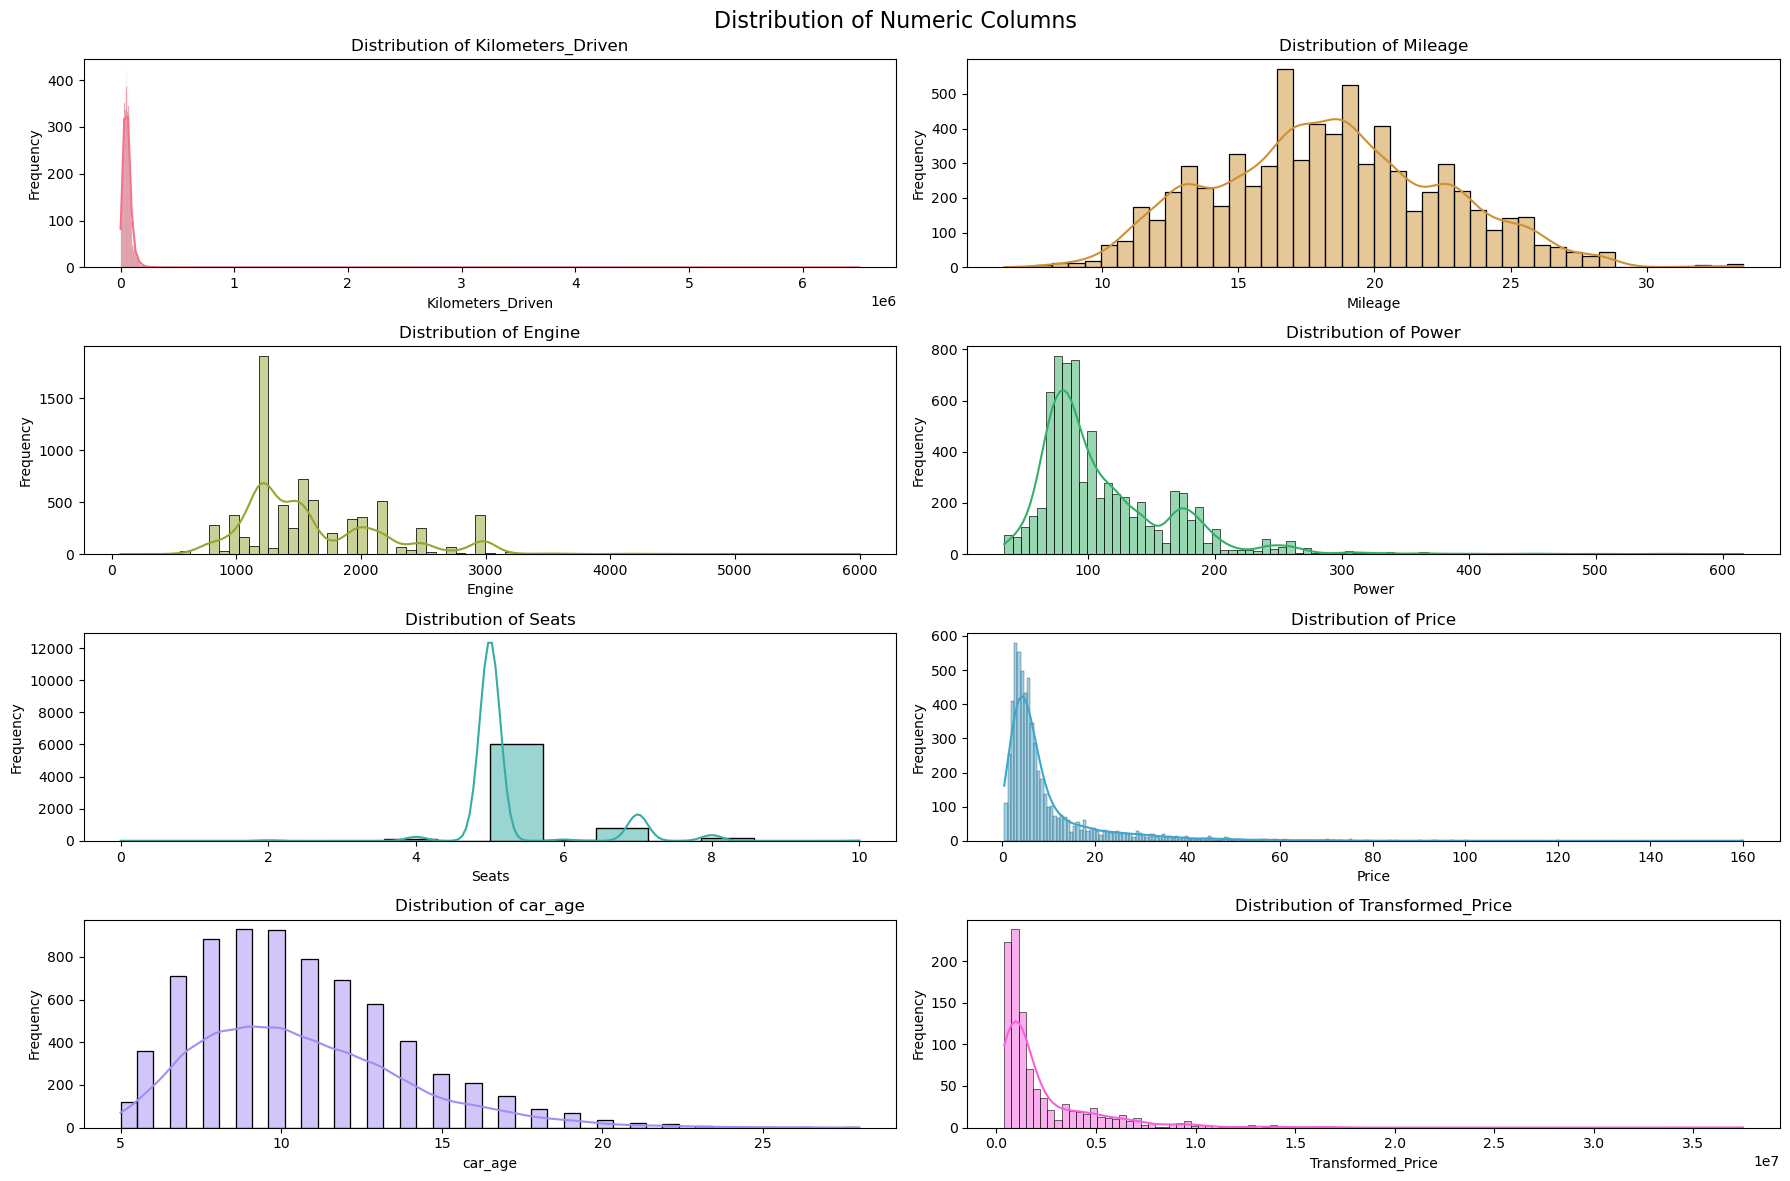

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Numeric Columns', fontsize=16)

color_palette = sns.color_palette("husl", len(numeric_columns))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column].dropna(), kde=True, color=color_palette[i-1])  
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [83]:
# there are right skewed columns that need to be fixed later.

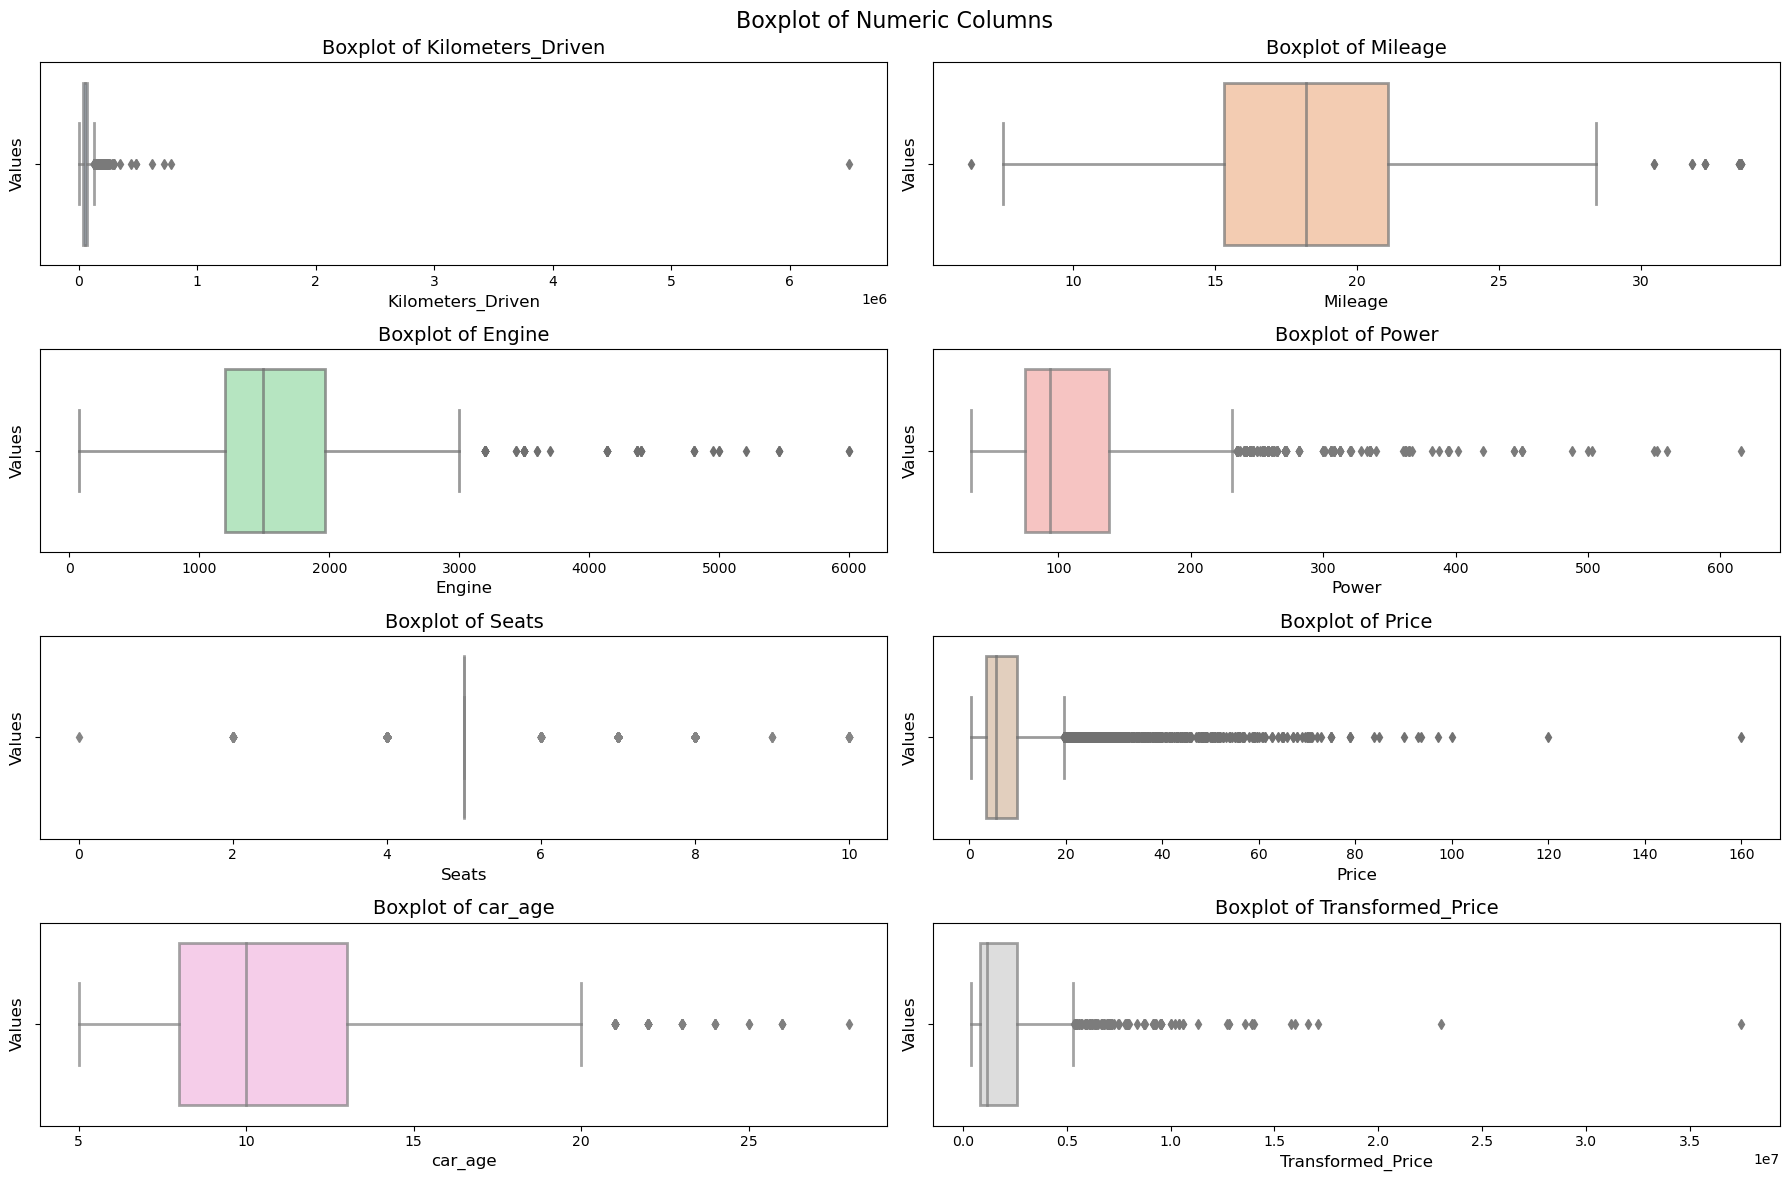

In [84]:
plt.figure(figsize=(18, 12))
plt.suptitle('Boxplot of Numeric Columns', fontsize=16)

color_palette = sns.color_palette("pastel")

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column], color=color_palette[i-1], linewidth=2, fliersize=5, boxprops=dict(alpha=.7), whiskerprops=dict(alpha=.7), capprops=dict(alpha=.7), medianprops=dict(alpha=.7))  
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Values", fontsize=12)

plt.tight_layout()
plt.show()


In [85]:
numeric_columns

['Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'car_age',
 'Transformed_Price']

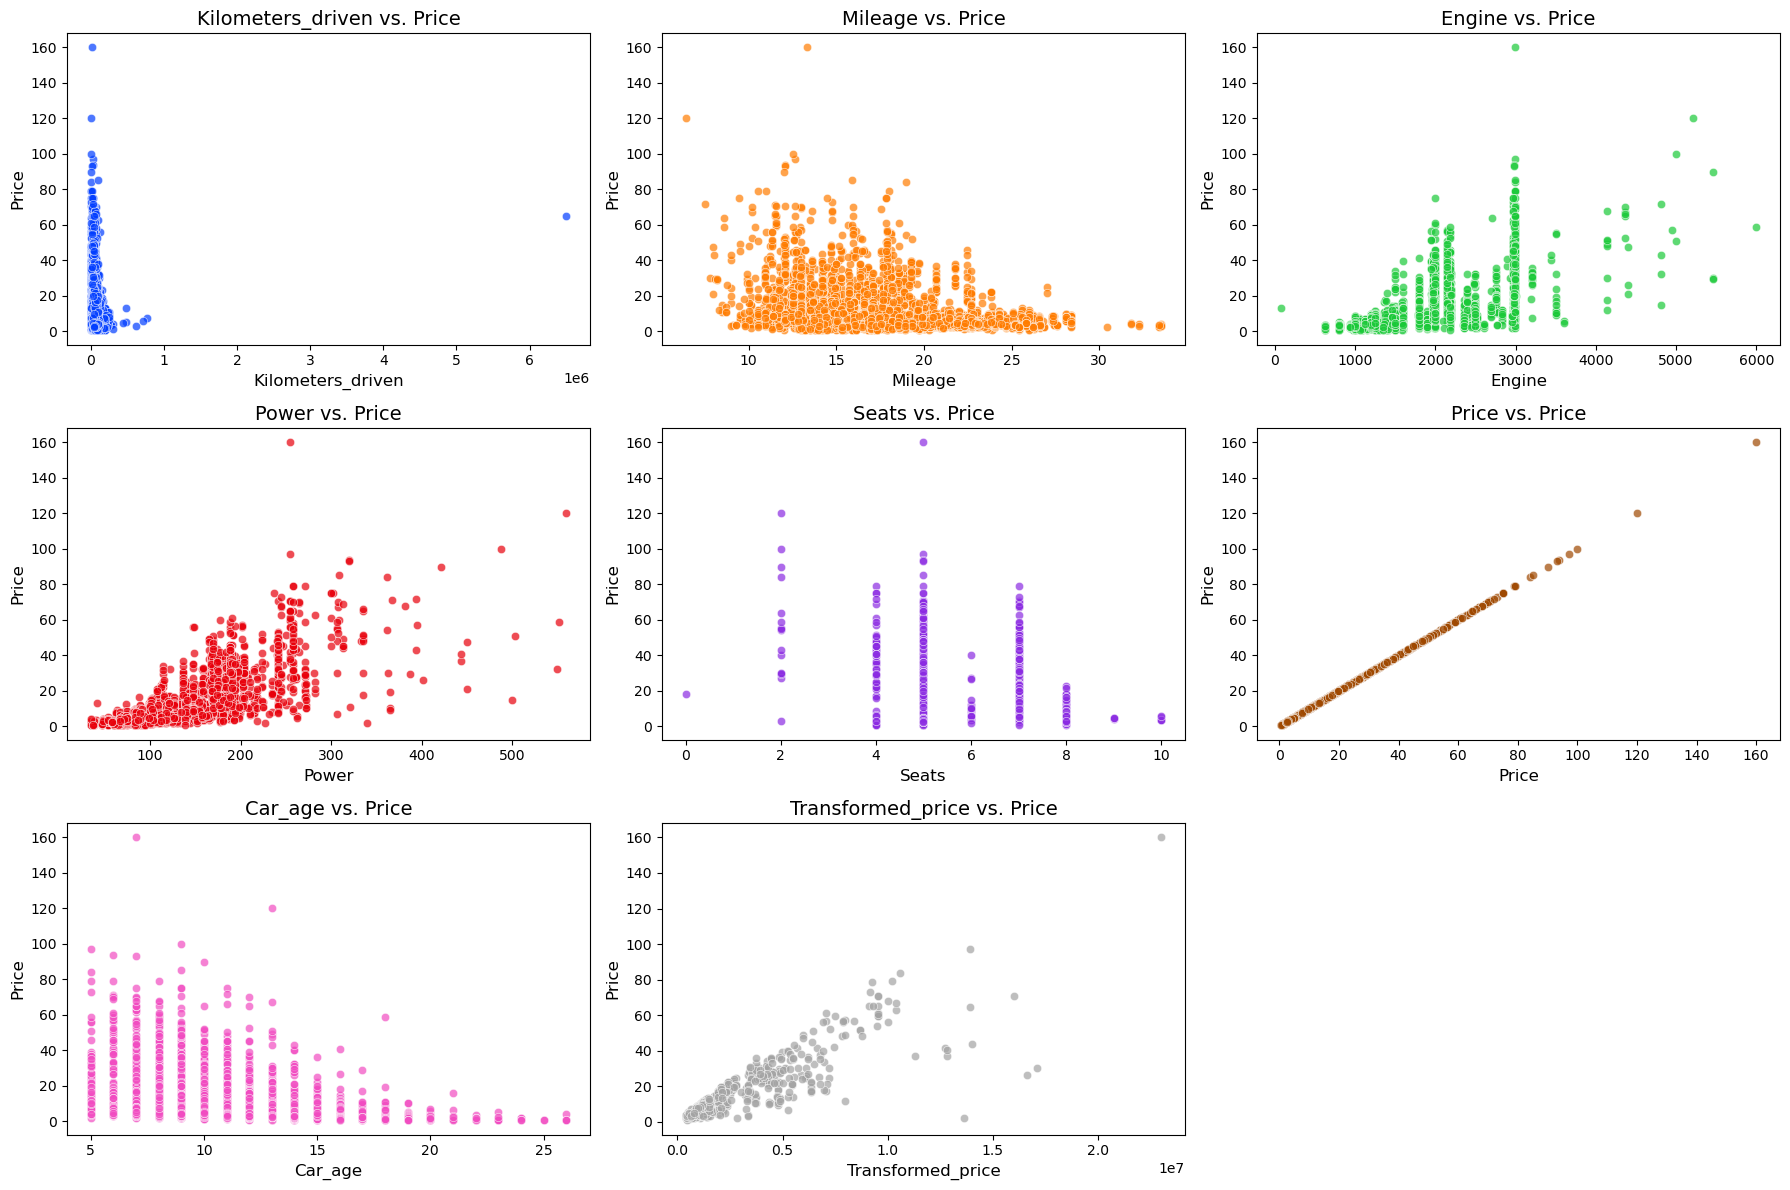

In [86]:
plt.figure(figsize=(18, 12))


color_palette = sns.color_palette("bright")

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=column, y='Price', data=df, color=color_palette[i-1], alpha=0.7)  
    plt.title(f"{column.capitalize()} vs. Price", fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel("Price", fontsize=12)

plt.tight_layout()
plt.show()

In [87]:
categorical_columns

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

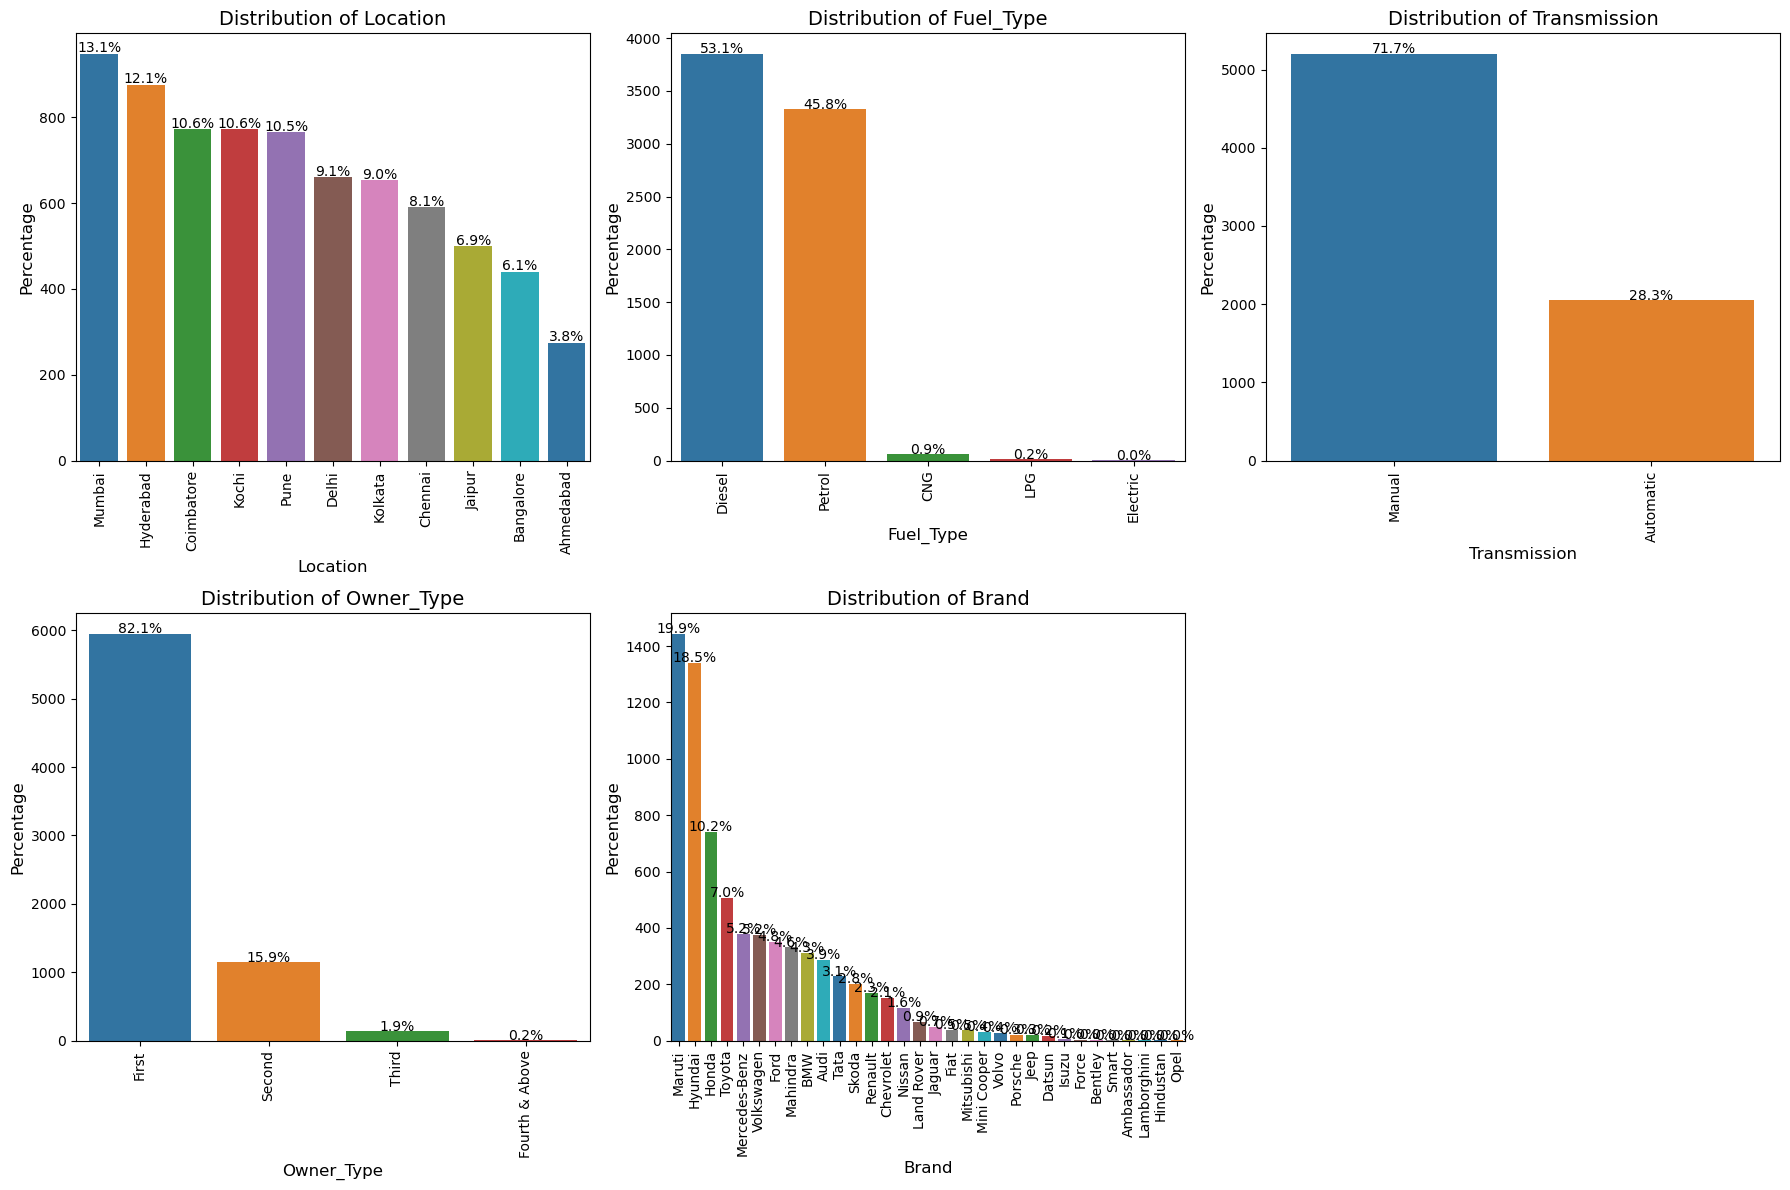

In [88]:
plt.figure(figsize=(18, 12))

color_palette = sns.color_palette("tab10")

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette=color_palette, order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Percentage", fontsize=12)
    plt.xticks(rotation=90) 

    total = float(len(df[column]))
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [89]:
# now it's time to fill missing values

In [90]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_Price            6246
Price                1233
Brand                   0
Model                   0
car_age                 0
Transformed_Price    6246
dtype: int64

In [91]:
mileage_counts = df.groupby('Fuel_Type')['Mileage'].mean()
print(mileage_counts)

Fuel_Type
CNG         25.445645
Diesel      18.784781
Electric          NaN
LPG         18.695833
Petrol      17.699746
Name: Mileage, dtype: float64


In [92]:
mileage_mean = df['Mileage'].mean()
print(mileage_mean)

18.34671502301579


In [93]:
df['Mileage'] = df.groupby(['Brand','Model','car_age'])['Mileage'].transform(lambda x: x.fillna(x.median()))

In [94]:
df['Mileage'].isnull().sum()

82

In [95]:
df['Mileage'] = df.groupby(['Brand','Model'])['Mileage'].transform(lambda x: x.fillna(x.median()))

In [96]:
df['Mileage'].isnull().sum()

80

In [97]:
df['Mileage'] = df['Mileage'].apply(lambda x: df['Mileage'].median() if pd.isnull(x) else x)

In [98]:
df['Mileage'].isnull().sum()

0

In [99]:
df['Engine'].isnull().sum()

46

In [100]:
df['Engine'] = df.groupby(['Brand','Model','car_age'])['Engine'].transform(lambda x: x.fillna(x.median()))

In [101]:
df['Engine'].isnull().sum()

45

In [102]:
nan_values_engine= df[df['Engine'].isna()]
nan_values_engine.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age,Transformed_Price
208,Kolkata,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,Maruti,Swift 1.3 VXi,14,NaN
733,Chennai,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,Maruti,Swift 1.3 VXi,18,NaN
749,Mumbai,55001,Diesel,Automatic,Second,18.2,NaN,NaN,NaN,NaN,26.50,Land Rover,Rover Range Rover 3.0 D,16,NaN
1294,Delhi,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,3.20,Honda,City 1.3 DX,15,NaN
1327,Hyderabad,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80,Maruti,Swift 1.3 ZXI,9,NaN


In [103]:
df['Power'].value_counts()

74.00     280
98.60     166
73.90     152
140.00    142
88.50     132
         ... 
340.00      1
80.90       1
68.10       1
301.73      1
241.60      1
Name: Power, Length: 383, dtype: int64

In [104]:
df['Power'].isnull().sum()

175

In [105]:
nan_values_power= df[df['Power'].isna()]
nan_values_power.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,car_age,Transformed_Price
76,Jaipur,111111,Diesel,Manual,First,17.8,1399.0,NaN,5.0,NaN,2.00,Ford,Fiesta 1.4 SXi TDCi,16,NaN
79,Hyderabad,87591,Petrol,Manual,First,18.2,1086.0,NaN,5.0,NaN,1.30,Hyundai,Santro Xing XL,19,NaN
89,Hyderabad,73745,Petrol,Manual,First,17.0,1086.0,NaN,5.0,NaN,2.10,Hyundai,Santro Xing XO,17,NaN
120,Mumbai,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,NaN,0.85,Hyundai,Santro Xing XL eRLX Euro III,19,NaN
143,Kochi,80759,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,NaN,1.67,Hyundai,Santro Xing XO eRLX Euro II,16,NaN


In [106]:
df[['Engine','Power']].head()

,Engine,Power
0,998.0,58.16
1,1582.0,126.20
2,1199.0,88.70
3,1248.0,88.76
4,1968.0,140.80


In [107]:
df.groupby(['Brand','Model','car_age'])['Engine'].median().head(20)

Brand       Model                                  car_age
Ambassador  Classic Nova Diesel                    21         1489.0
Audi        A3 35 TDI Attraction                   10         1968.0
            A3 35 TDI Premium                      8          1968.0
            A3 35 TDI Premium Plus                 8          1968.0
                                                   9          1968.0
            A3 35 TDI Technology                   7          1968.0
            A4 1.8 TFSI                            13         1781.0
                                                   14         1781.0
            A4 1.8 TFSI Technology Edition         12         1798.0
            A4 2.0 TDI                             10         1968.0
                                                   11         1968.0
                                                   12         1968.0
                                                   13         1968.0
                                            

In [108]:
df.groupby(['Brand','Model','car_age'])['Power'].median().head(20)

Brand       Model                                  car_age
Ambassador  Classic Nova Diesel                    21          35.50
Audi        A3 35 TDI Attraction                   10         143.00
            A3 35 TDI Premium                      8          143.00
            A3 35 TDI Premium Plus                 8          143.00
                                                   9          143.00
            A3 35 TDI Technology                   7          143.00
            A4 1.8 TFSI                            13         163.20
                                                   14         163.20
            A4 1.8 TFSI Technology Edition         12         167.62
            A4 2.0 TDI                             10         147.51
                                                   11         147.51
                                                   12         147.51
                                                   13         147.51
                                            

In [109]:
df['Engine']=df.groupby(['Brand','Model','car_age'])['Engine'].apply(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['Brand','Model','car_age'])['Power'].apply(lambda x:x.fillna(x.median()))

In [110]:
df['Engine'].isnull().sum()

45

In [111]:
df['Engine']=df.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [112]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 40
Power                 136
Seats                  53
New_Price            6246
Price                1233
Brand                   0
Model                   0
car_age                 0
Transformed_Price    6246
dtype: int64

In [113]:
df['Power'] = df['Power'].fillna(df['Power'].median())
df['Engine'] = df['Engine'].fillna(df['Engine'].median())

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7252 non-null   float64 
 6   Engine             7252 non-null   float64 
 7   Power              7252 non-null   float64 
 8   Seats              7199 non-null   float64 
 9   New_Price          1006 non-null   object  
 10  Price              6019 non-null   float64 
 11  Brand              7252 non-null   object  
 12  Model              7252 non-null   object  
 13  car_age            7252 non-null   int64   
 14  Transformed_Price  1006 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(4)
memory 

In [115]:
df['Seats'].value_counts()

5.0     6046
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [116]:
df['Seats'].isnull().sum()

53

In [117]:
df['Seats']=df.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [118]:
df['Seats'].isnull().sum()

46

In [119]:
# normally cars have 5 seats so we can fill the missing values with 5
df['Seats']=df['Seats'].fillna(5)

In [120]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6246
Price                1233
Brand                   0
Model                   0
car_age                 0
Transformed_Price    6246
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7252 non-null   float64 
 6   Engine             7252 non-null   float64 
 7   Power              7252 non-null   float64 
 8   Seats              7252 non-null   float64 
 9   New_Price          1006 non-null   object  
 10  Price              6019 non-null   float64 
 11  Brand              7252 non-null   object  
 12  Model              7252 non-null   object  
 13  car_age            7252 non-null   int64   
 14  Transformed_Price  1006 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(4)
memory 

In [122]:
# we have already transformed the new_price column, so we can drop it

In [123]:
df.drop(columns=['New_Price'], inplace=True)

In [124]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,car_age,Transformed_Price
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,14,NaN
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,9,NaN
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,13,861000.0
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,12,NaN
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,11,NaN


In [125]:
df['Transformed_Price'].isnull().sum()

6246

In [126]:
# there are lots of missing values, at this point dropping this column may be better

In [127]:
df.drop(columns=['Transformed_Price'], inplace=True)

In [128]:
df['Price'].isnull().sum()

1233

In [129]:
grouped_median_price = df.groupby(['Brand', 'Model'])['Price'].median().reset_index()
print(grouped_median_price)

           Brand                     Model  Price
0     Ambassador       Classic Nova Diesel   1.35
1           Audi      A3 35 TDI Attraction  16.50
2           Audi         A3 35 TDI Premium  19.25
3           Audi    A3 35 TDI Premium Plus  18.90
4           Audi      A3 35 TDI Technology  22.50
...          ...                       ...    ...
2036       Volvo            XC60 D4 Summum  18.25
2037       Volvo                   XC60 D5  13.80
2038       Volvo       XC60 D5 Inscription  17.18
2039       Volvo  XC90 2007-2015 D5 AT AWD  23.58
2040       Volvo     XC90 2007-2015 D5 AWD  23.65

[2041 rows x 3 columns]


In [130]:
df['Price'] = df.groupby(['Brand', 'Model'])['Price'].transform(lambda x: x.fillna(x.median()))

In [131]:
df['Price'].isnull().sum()

178

In [132]:
df['Price'] = df.groupby(['Brand'])['Price'].transform(lambda x: x.fillna(x.median()))

In [133]:
df['Price'].isnull().sum()

2

In [134]:
price_median = df['Price'].median()
df['Price'].fillna(price_median, inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7252 non-null   float64 
 6   Engine             7252 non-null   float64 
 7   Power              7252 non-null   float64 
 8   Seats              7252 non-null   float64 
 9   Price              7252 non-null   float64 
 10  Brand              7252 non-null   object  
 11  Model              7252 non-null   object  
 12  car_age            7252 non-null   int64   
dtypes: category(3), float64(5), int64(2), object(3)
memory usage: 645.0+ KB


In [136]:
df['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             742
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
Opel                1
Name: Brand, dtype: int64

In [137]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'Opel'], dtype=object)

In [138]:
df['Brand'].isnull().sum()

0

In [139]:
df.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,max,median,mean
Brand,,,
Ambassador,1.35,1.3500,1.350000
Audi,72.94,23.1600,25.175930
BMW,93.67,21.5000,25.349423
Bentley,59.00,59.0000,59.000000
Chevrolet,9.87,2.5000,3.043013
Datsun,3.95,3.1000,3.128529
Fiat,7.71,2.6000,3.164868
Force,12.00,8.0000,9.333333
Ford,56.80,5.3600,6.706182


In [140]:
import pandas as pd

data = pd.DataFrame(df.groupby(['Brand'])['Price'].agg({'median','mean','max'}))

def categorize_median(median):
    if median <= 15:
        return 'Low'
    elif 15 < median <= 40:
        return 'Medium'
    else:
        return 'High'

data['Brand_Class'] = data['median'].apply(categorize_median)

df = df.merge(data['Brand_Class'], how='left', on='Brand')


In [141]:
df['Brand_Class'].value_counts()

Low       6060
Medium    1170
High        22
Name: Brand_Class, dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7252 non-null   float64 
 6   Engine             7252 non-null   float64 
 7   Power              7252 non-null   float64 
 8   Seats              7252 non-null   float64 
 9   Price              7252 non-null   float64 
 10  Brand              7252 non-null   object  
 11  Model              7252 non-null   object  
 12  car_age            7252 non-null   int64   
 13  Brand_Class        7252 non-null   object  
dtypes: category(3), float64(5), int64(2), object(4)
memory usage: 701.6+ KB


In [143]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,car_age,Brand_Class
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,14,Low
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,9,Low
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,13,Low
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,12,Low
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,11,Medium


In [144]:
df['Brand_Class'] = df['Brand_Class'].astype('category')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   object  
 1   Kilometers_Driven  7252 non-null   int64   
 2   Fuel_Type          7252 non-null   category
 3   Transmission       7252 non-null   category
 4   Owner_Type         7252 non-null   category
 5   Mileage            7252 non-null   float64 
 6   Engine             7252 non-null   float64 
 7   Power              7252 non-null   float64 
 8   Seats              7252 non-null   float64 
 9   Price              7252 non-null   float64 
 10  Brand              7252 non-null   object  
 11  Model              7252 non-null   object  
 12  car_age            7252 non-null   int64   
 13  Brand_Class        7252 non-null   category
dtypes: category(4), float64(5), int64(2), object(3)
memory usage: 652.2+ KB


In [146]:
# it seems there is no missing values anymore, therefore we can move on to build our model

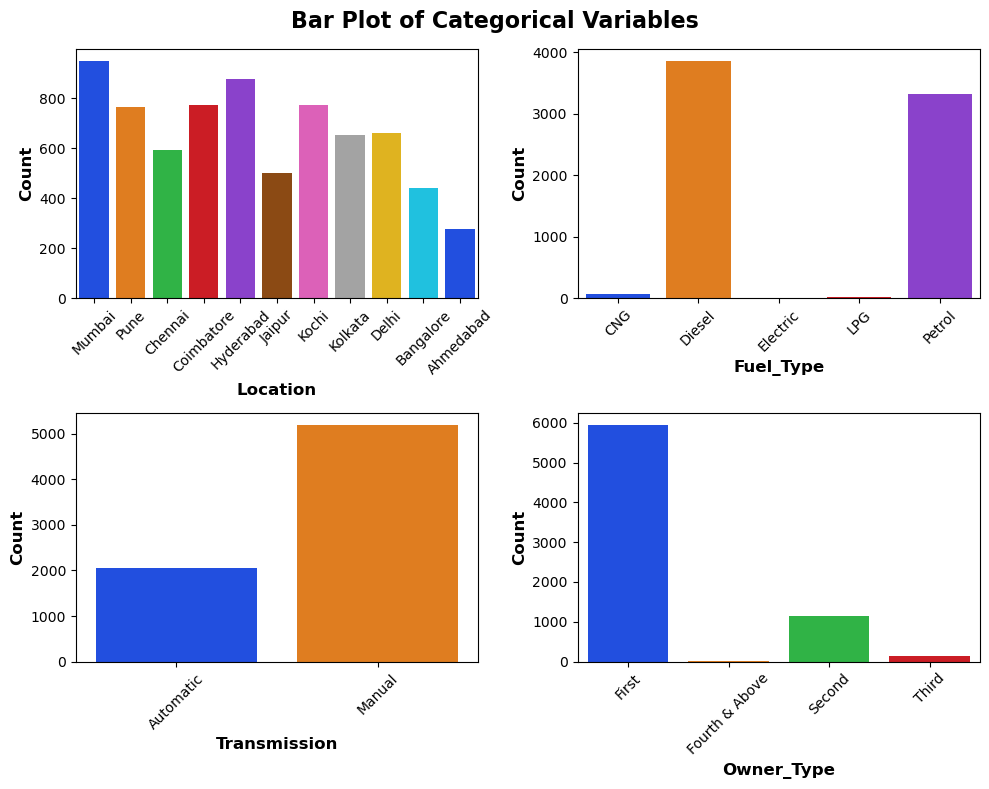

In [147]:
import seaborn as sns

categorical_columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

plt.figure(figsize=(10, 8))

color_palette = sns.color_palette("bright")

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[column], palette=color_palette)
    plt.xlabel(column, fontsize=12, fontweight='bold')  
    plt.ylabel("Count", fontsize=12, fontweight='bold') 
    plt.xticks(rotation=45)

plt.suptitle('Bar Plot of Categorical Variables', fontsize=16, fontweight='bold') 
plt.tight_layout()
plt.show()


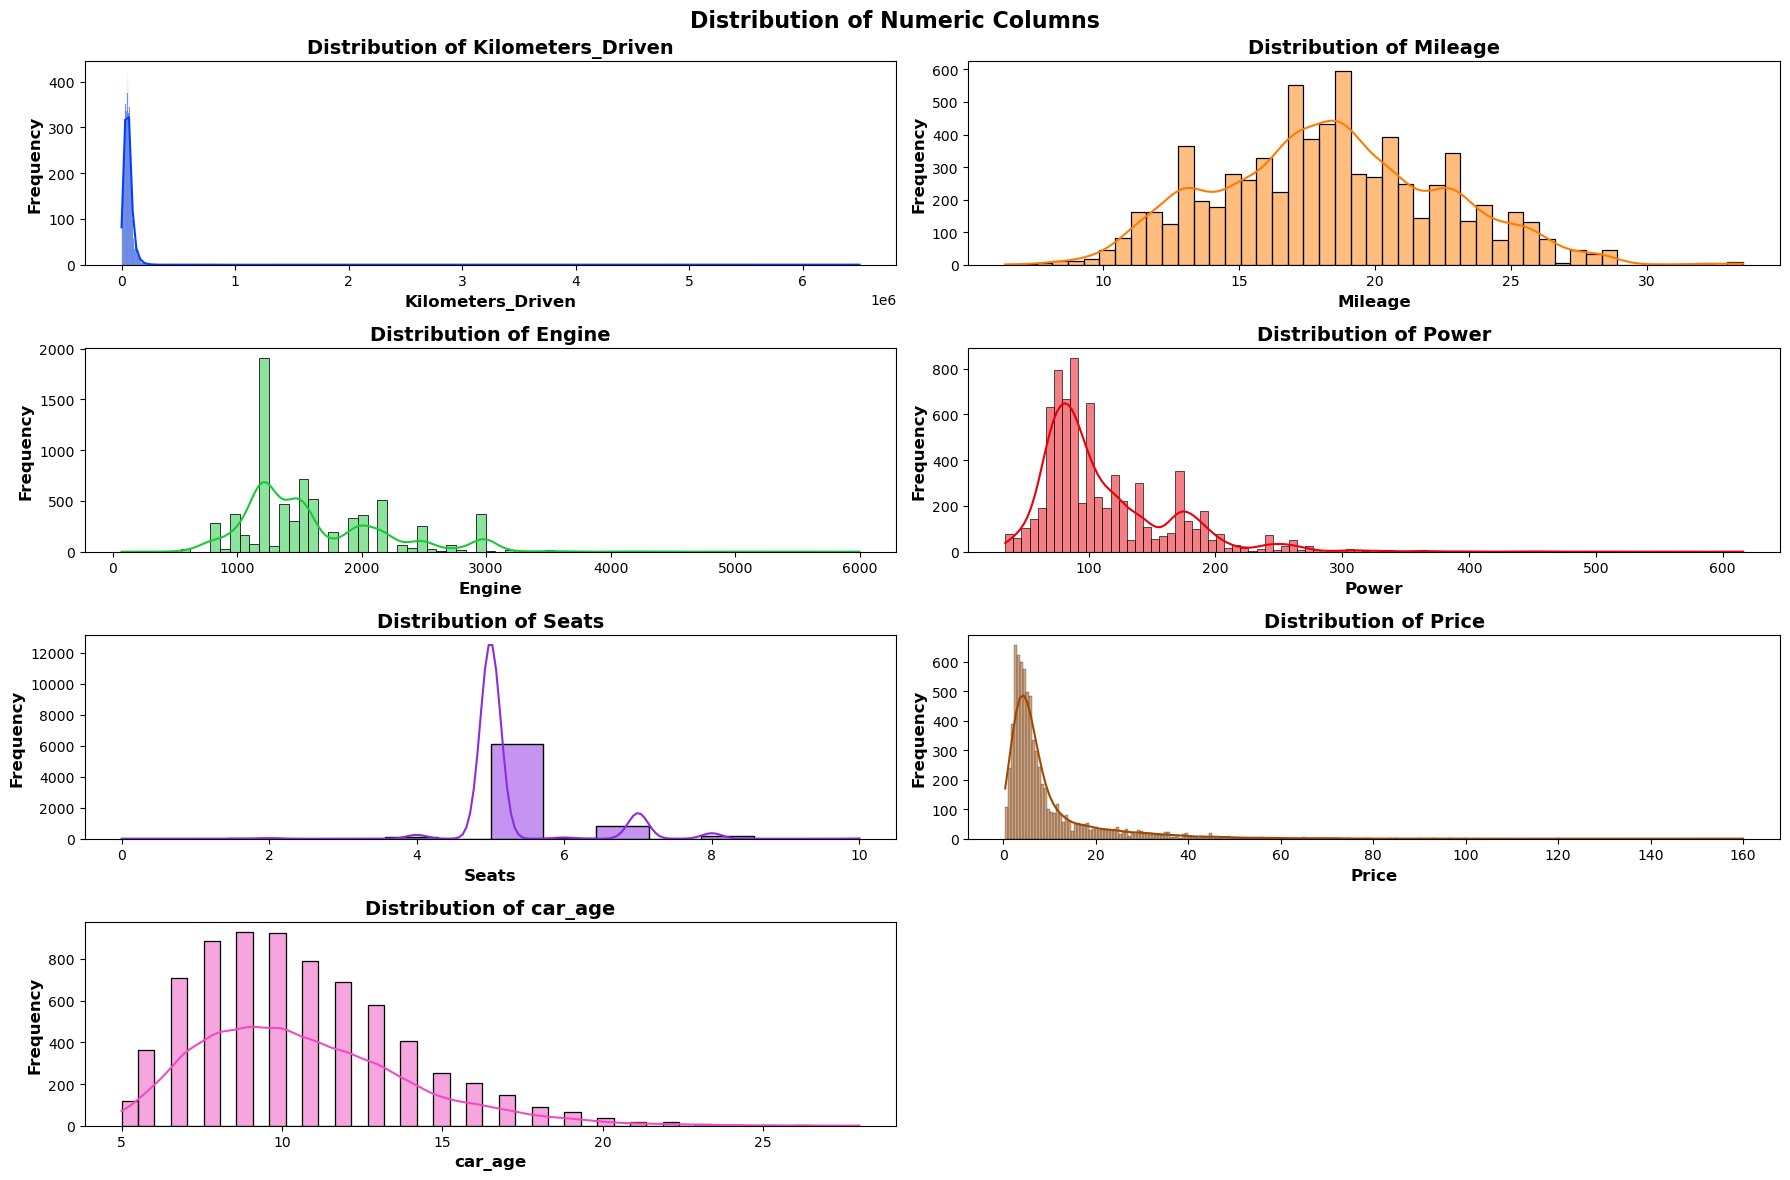

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns2 = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'car_age']

plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Numeric Columns', fontsize=16, fontweight='bold')  

color_palette = sns.color_palette("bright") 

for i, column in enumerate(numeric_columns2, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column].dropna(), kde=True, color=color_palette[i-1])
    plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')  
    plt.xlabel(column, fontsize=12, fontweight='bold') 
    plt.ylabel("Frequency", fontsize=12, fontweight='bold')  

plt.tight_layout()
plt.show()


In [149]:
# as can be seen the columns of kilometers_driven, power and price have right skewed distribution,
# so logaritmic transformation is necessary

In [150]:
import numpy as np

def Perform_log_transform(df, col_log):
    """Perform Log Transformation of specified columns in dataframe"""
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    df['Power_log'] = np.log(df['Power'])  
    df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven']) 
    df['Price_log'] = np.log(df['Price']) 
    df.info()


In [151]:
Perform_log_transform(df, ['Kilometers_Driven', 'Price', 'Power'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7251
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7252 non-null   object  
 1   Kilometers_Driven      7252 non-null   int64   
 2   Fuel_Type              7252 non-null   category
 3   Transmission           7252 non-null   category
 4   Owner_Type             7252 non-null   category
 5   Mileage                7252 non-null   float64 
 6   Engine                 7252 non-null   float64 
 7   Power                  7252 non-null   float64 
 8   Seats                  7252 non-null   float64 
 9   Price                  7252 non-null   float64 
 10  Brand                  7252 non-null   object  
 11  Model                  7252 non-null   object  
 12  car_age                7252 non-null   int64   
 13  Brand_Class            7252 non-null   category
 14  Kilometers_Driven_log  7252 non-null   f

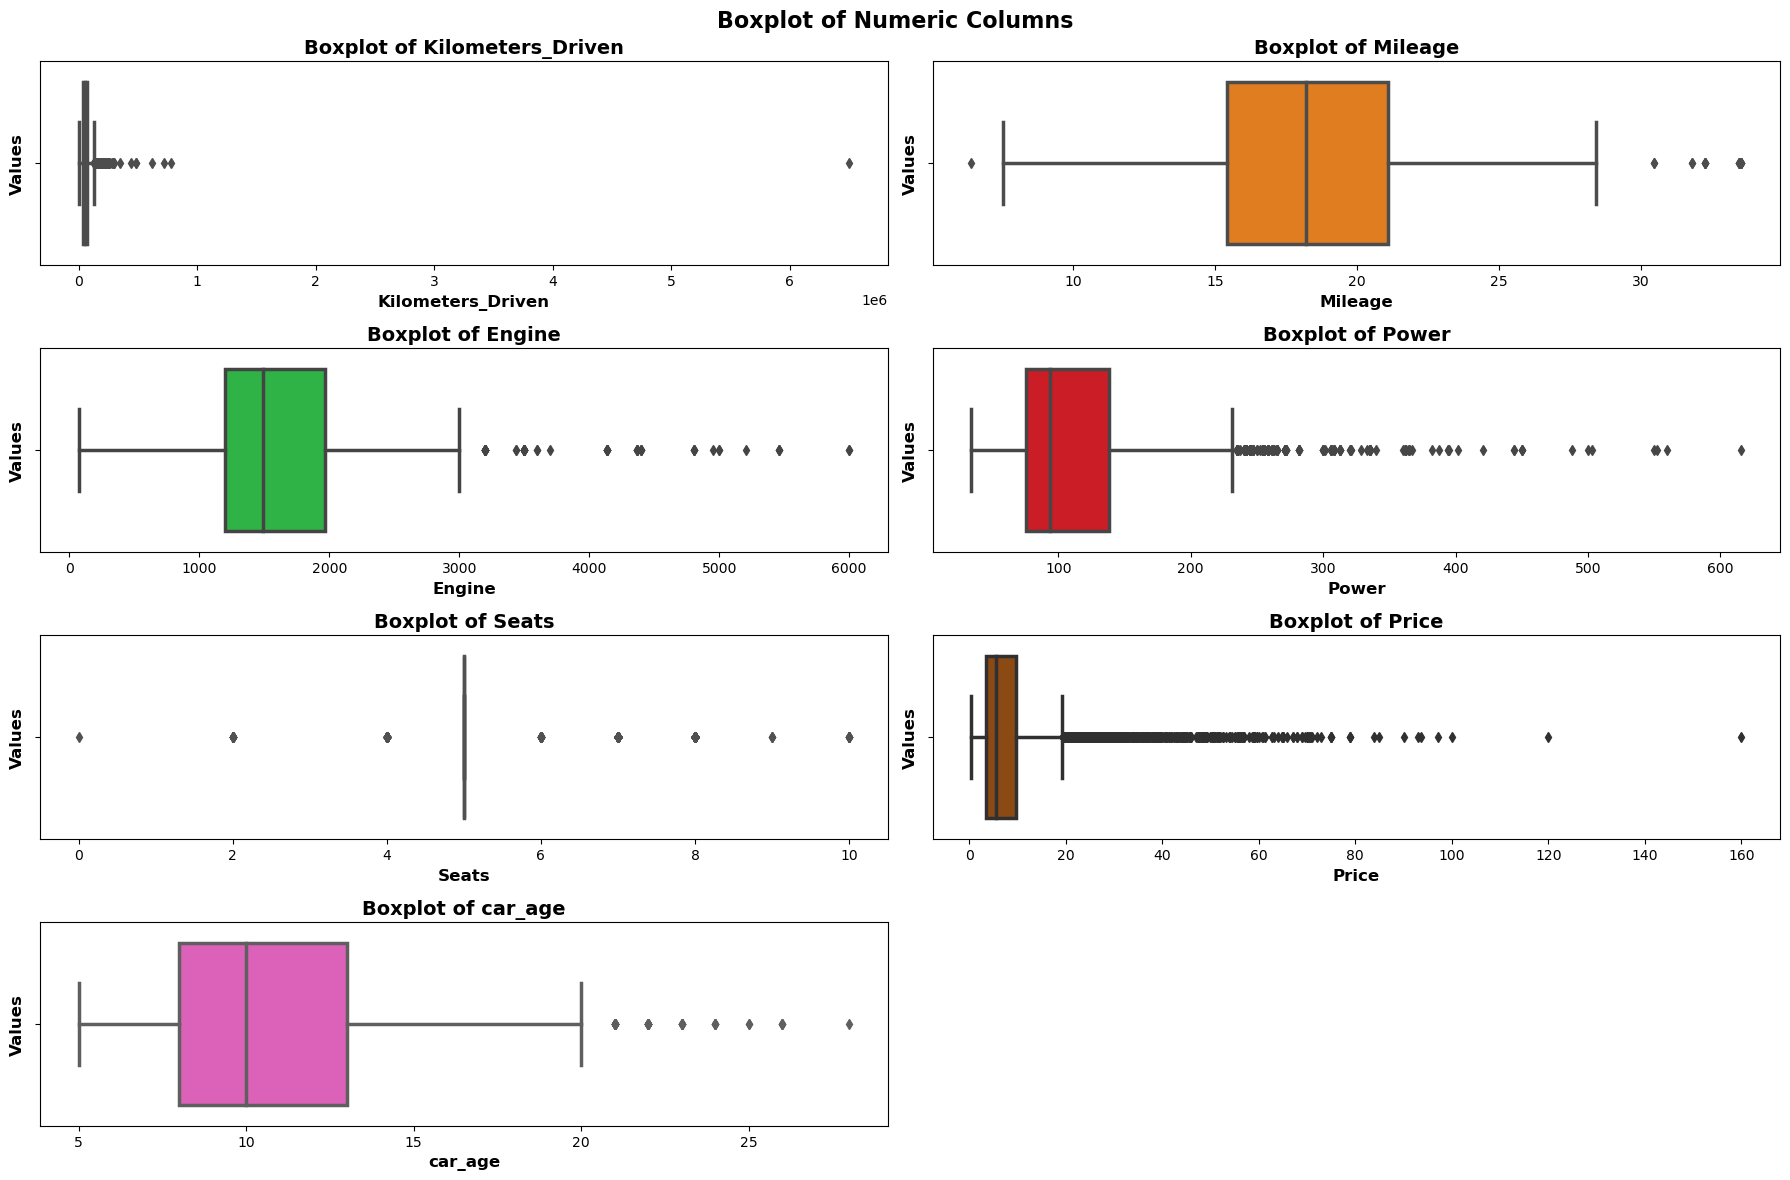

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns2 = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'car_age']

plt.figure(figsize=(18, 12))
plt.suptitle('Boxplot of Numeric Columns', fontsize=16, fontweight='bold')  

color_palette = sns.color_palette("bright")  

for i, column in enumerate(numeric_columns2, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column], color=color_palette[i-1], linewidth=2.5)  
    plt.title(f"Boxplot of {column}", fontsize=14, fontweight='bold') 
    plt.xlabel(column, fontsize=12, fontweight='bold')  
    plt.ylabel("Values", fontsize=12, fontweight='bold')  

plt.tight_layout()
plt.show()


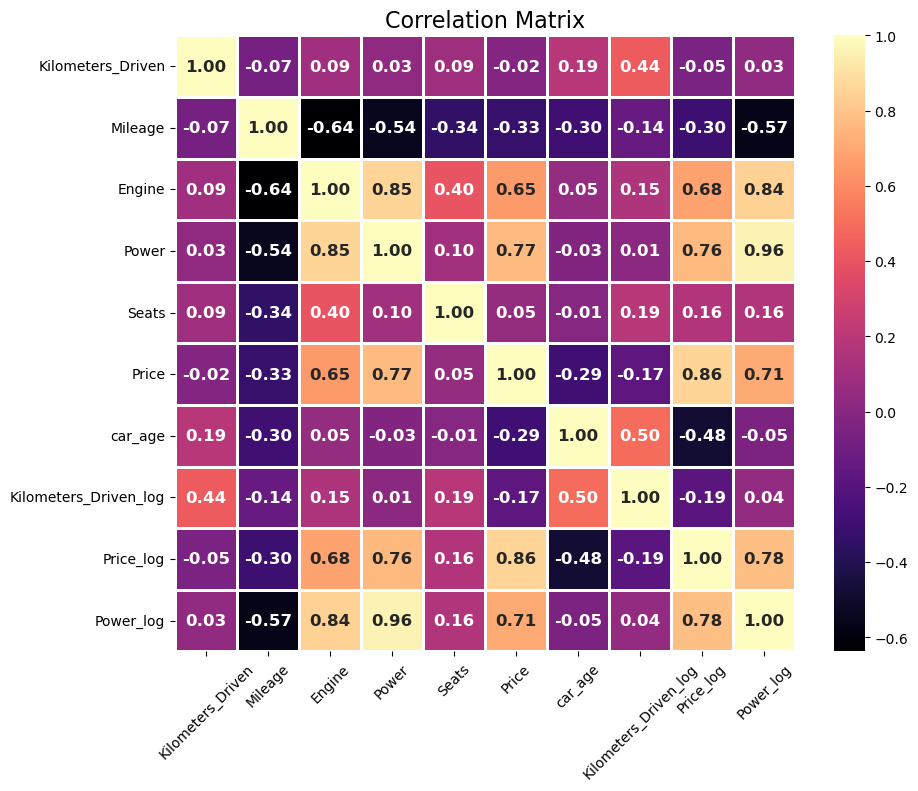

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt=".2f", linewidths=1, annot_kws={"fontsize":12, "fontweight":"bold"})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)  
plt.show()


In [154]:
corr = df.corr()
high_corr_features = corr['Price'][corr['Price'] > 0.5].index.tolist()
print("Highly correlated features with Price:")
print(high_corr_features)

Highly correlated features with Price:
['Engine', 'Power', 'Price', 'Price_log', 'Power_log']


In [155]:
corr_matrix = df.corr()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

high_corr_pairs = (upper_triangle.abs() > 0.8).stack()

high_corr_pairs = high_corr_pairs[high_corr_pairs].index.tolist()
print("Highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly correlated feature pairs:
('Engine', 'Power')
('Engine', 'Power_log')
('Power', 'Power_log')
('Price', 'Price_log')


C:\Users\honey\AppData\Local\Temp\ipykernel_19888\52405423.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [156]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,car_age,Brand_Class,Kilometers_Driven_log,Price_log,Power_log
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,14,Low,11.184421,0.559616,4.063198
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,9,Low,10.621327,2.525729,4.837868
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,13,Low,10.736397,1.504077,4.485260
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,12,Low,11.373663,1.791759,4.485936
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,11,Medium,10.613246,2.875822,4.947340


In [157]:
df.drop(['Model','Brand'],axis=1,inplace=True)

In [158]:
df.drop(['Seats', 'Power', 'Kilometers_Driven', 'Price'], axis=1, inplace=True)

In [159]:
df.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,car_age,Brand_Class,Kilometers_Driven_log,Price_log,Power_log
0,Mumbai,CNG,Manual,First,26.60,998.0,14,Low,11.184421,0.559616,4.063198
1,Pune,Diesel,Manual,First,19.67,1582.0,9,Low,10.621327,2.525729,4.837868
2,Chennai,Petrol,Manual,First,18.20,1199.0,13,Low,10.736397,1.504077,4.485260
3,Chennai,Diesel,Manual,First,20.77,1248.0,12,Low,11.373663,1.791759,4.485936
4,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,11,Medium,10.613246,2.875822,4.947340


In [160]:
X = df.drop(['Price_log'], axis=1)
y = df['Price_log']

In [161]:
X= pd.get_dummies(X,columns=X.select_dtypes(include=['object', 'category']).columns.tolist(),drop_first=True)

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

y_pred = regr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


R^2 Score: 0.8809000879565383


In [163]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

ols_model = sm.OLS(y_train, X_train_sm)
ols_results = ols_model.fit()

print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1779.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:01:16   Log-Likelihood:                -642.74
No. Observations:                5076   AIC:                             1337.
Df Residuals:                    5050   BIC:                             1507.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8207      0.004    470.824      0.0